<a href="https://colab.research.google.com/github/LeonZou7/TF-Study-Log/blob/master/3_layer_NN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

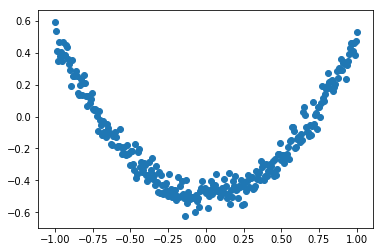

0.1929644
0.01679646
0.011233172
0.008939892
0.0076096565
0.006772952
0.006201455
0.005805505
0.0055372776
0.0053361775
0.005164903
0.0050436384
0.004947148
0.0048668617
0.004798372
0.0047384803
0.0046880175
0.0046386216
0.004588249
0.004541122


In [21]:
# Example 3
# 简单的三层神经网络：输入 -> 隐藏层 -> 输出
# 结果可视化

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def add_layer(inputs, in_size, out_size, activation_function=None):
  # 定义两个参数并初始化，Weights是随机矩阵
  Weights = tf.Variable(tf.random_normal([in_size, out_size]))
  # biaes设置为一个数列，并且初始化时不推荐为0
  biaes = tf.Variable(tf.zeros([1, out_size]) + 0.1)
  
  # 输出的预测值 = inputs * Weights + biaes
  Wx_plus_b = tf.matmul(inputs, Weights) + biaes
  
  # 使用激活函数
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
    
  return outputs


### 定义数据形式 start ###
# x_data有300行1列，从-1到1之间的数据。newaxis：定义维度
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
# 定义噪声数据，用于干扰训练数据，使其更像真实数据
noise = np.random.normal(0, 0.05, x_data.shape)
# 输出值 = x_data**2 - 0.5 + noise
y_data = np.square(x_data) - 0.5 + noise
### 定义数据形式 end ###

# 定义xs、ys，用于传入神经网络中进行训练
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

'''
添加隐藏层和输出层（输入层已固定）
由于输入和输出值各只有一个特征（x_data: linspace; y_data: square），
所以输入层和输出层各有1个神经元
隐藏层中有10个神经元（自定义）
结构示意图: 1 -> 10 -> 1
'''
l1 = add_layer(xs, 1, 10, tf.nn.relu)
prediction = add_layer(l1, 10, 1, None)

# 定义残差avr_loss（均值）
loss = tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1])
avr_loss = tf.reduce_mean(loss)

# 训练步骤：使用梯度下降优化器缩小残差，学习率自定义为0.1
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(avr_loss)

# 初始化变量和定义Session
init = tf.global_variables_initializer()
sess = tf.Session()

# 开始训练 实现可视化
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
  sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
  if i % 50 == 0:
    print(sess.run(avr_loss, feed_dict={xs:x_data, ys:y_data}))
    try:
      ax.lines.remove(lines[0])
    except Exception:
      pass
    prediction_value = sess.run(prediction, feed_dict={xs:x_data})
    lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
    plt.pause(0.1)